In [16]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import glob
import matplotlib
import matplotlib.pyplot as plt
from datetime import timedelta
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from collections import Counter
import cot_reports as cot
import os


***Load Data***

*Load predownloaded data from https://www.cftc.gov/MarketReports/CommitmentsofTraders/HistoricalCompressed/index.htm
containing all Commitment of Trader reports since 2010


In [17]:
start_year = 2022
end_year = 2024
step_year = 1  # one year

In [25]:
import time

data = pd.DataFrame()
for i in range(start_year, end_year + 1, step_year):
    temp_df = cot.cot_year(year=i, store_txt=False, cot_report_type='legacy_fut')
    data = pd.concat([temp_df, data ], ignore_index=True)

    # add 1 second delay
    time.sleep(1)

Selected: legacy_fut
Downloaded single year data from: 2022
Selected: legacy_fut
Downloaded single year data from: 2023
Selected: legacy_fut
Downloaded single year data from: 2024


In [26]:
data.head()

,Market and Exchange Names,As of Date in Form YYMMDD,As of Date in Form YYYY-MM-DD,CFTC Contract Market Code,CFTC Market Code in Initials,CFTC Region Code,CFTC Commodity Code,Open Interest (All),Noncommercial Positions-Long (All),Noncommercial Positions-Short (All),...,Concentration-Gross LT =8 TDR-Long (Other),Concentration-Gross LT =8 TDR-Short(Other),Concentration-Net LT =4 TDR-Long (Other),Concentration-Net LT =4 TDR-Short (Other),Concentration-Net LT =8 TDR-Long (Other),Concentration-Net LT =8 TDR-Short (Other),Contract Units,CFTC Contract Market Code (Quotes),CFTC Market Code in Initials (Quotes),CFTC Commodity Code (Quotes)
0,WHEAT-SRW - CHICAGO BOARD OF TRADE,240827,2024-08-27,001602,CBT,0,1,393876,139525,172206,...,52.0,43.8,37.5,32.1,52.0,43.2,"(CONTRACTS OF 5,000 BUSHELS)",001602,CBT,1
1,WHEAT-SRW - CHICAGO BOARD OF TRADE,240820,2024-08-20,001602,CBT,0,1,414351,134387,160093,...,52.8,41.9,37.9,31.1,52.8,41.7,"(CONTRACTS OF 5,000 BUSHELS)",001602,CBT,1
2,WHEAT-SRW - CHICAGO BOARD OF TRADE,240813,2024-08-13,001602,CBT,0,1,401604,125365,164270,...,54.2,42.6,39.0,31.7,54.2,42.6,"(CONTRACTS OF 5,000 BUSHELS)",001602,CBT,1
3,WHEAT-SRW - CHICAGO BOARD OF TRADE,240806,2024-08-06,001602,CBT,0,1,431547,122142,162527,...,57.7,41.7,41.6,32.3,57.3,41.7,"(CONTRACTS OF 5,000 BUSHELS)",001602,CBT,1
4,WHEAT-SRW - CHICAGO BOARD OF TRADE,240730,2024-07-30,001602,CBT,0,1,432863,128652,171910,...,60.8,38.5,46.0,28.5,60.8,38.4,"(CONTRACTS OF 5,000 BUSHELS)",001602,CBT,1


In [29]:
# Create a folder to save data if it doesn't exist
folder_name = 'data'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    

### Save data to csv file

In [31]:
data.to_csv(f'data/cot_{start_year}-{end_year}.csv')

### Load data from csv file

In [18]:
data = pd.read_csv(f'data/cot_{start_year}-{end_year}.csv')

In [19]:
data.head()

,Unnamed: 0,Market and Exchange Names,As of Date in Form YYMMDD,As of Date in Form YYYY-MM-DD,CFTC Contract Market Code,CFTC Market Code in Initials,CFTC Region Code,CFTC Commodity Code,Open Interest (All),Noncommercial Positions-Long (All),...,Concentration-Gross LT =8 TDR-Long (Other),Concentration-Gross LT =8 TDR-Short(Other),Concentration-Net LT =4 TDR-Long (Other),Concentration-Net LT =4 TDR-Short (Other),Concentration-Net LT =8 TDR-Long (Other),Concentration-Net LT =8 TDR-Short (Other),Contract Units,CFTC Contract Market Code (Quotes),CFTC Market Code in Initials (Quotes),CFTC Commodity Code (Quotes)
0,0,WHEAT-SRW - CHICAGO BOARD OF TRADE,240827,2024-08-27,001602,CBT,0,1,393876,139525,...,52.0,43.8,37.5,32.1,52.0,43.2,"(CONTRACTS OF 5,000 BUSHELS)",001602,CBT,1
1,1,WHEAT-SRW - CHICAGO BOARD OF TRADE,240820,2024-08-20,001602,CBT,0,1,414351,134387,...,52.8,41.9,37.9,31.1,52.8,41.7,"(CONTRACTS OF 5,000 BUSHELS)",001602,CBT,1
2,2,WHEAT-SRW - CHICAGO BOARD OF TRADE,240813,2024-08-13,001602,CBT,0,1,401604,125365,...,54.2,42.6,39.0,31.7,54.2,42.6,"(CONTRACTS OF 5,000 BUSHELS)",001602,CBT,1
3,3,WHEAT-SRW - CHICAGO BOARD OF TRADE,240806,2024-08-06,001602,CBT,0,1,431547,122142,...,57.7,41.7,41.6,32.3,57.3,41.7,"(CONTRACTS OF 5,000 BUSHELS)",001602,CBT,1
4,4,WHEAT-SRW - CHICAGO BOARD OF TRADE,240730,2024-07-30,001602,CBT,0,1,432863,128652,...,60.8,38.5,46.0,28.5,60.8,38.4,"(CONTRACTS OF 5,000 BUSHELS)",001602,CBT,1


### Filter dataframe to show only asset wanted.

In [20]:
#Filter large dataframe for only 'Wheat' data
df = data[data['Market and Exchange Names'].str.contains("WHEAT", na=False)]

df.head()

,Unnamed: 0,Market and Exchange Names,As of Date in Form YYMMDD,As of Date in Form YYYY-MM-DD,CFTC Contract Market Code,CFTC Market Code in Initials,CFTC Region Code,CFTC Commodity Code,Open Interest (All),Noncommercial Positions-Long (All),...,Concentration-Gross LT =8 TDR-Long (Other),Concentration-Gross LT =8 TDR-Short(Other),Concentration-Net LT =4 TDR-Long (Other),Concentration-Net LT =4 TDR-Short (Other),Concentration-Net LT =8 TDR-Long (Other),Concentration-Net LT =8 TDR-Short (Other),Contract Units,CFTC Contract Market Code (Quotes),CFTC Market Code in Initials (Quotes),CFTC Commodity Code (Quotes)
0,0,WHEAT-SRW - CHICAGO BOARD OF TRADE,240827,2024-08-27,001602,CBT,0,1,393876,139525,...,52.0,43.8,37.5,32.1,52.0,43.2,"(CONTRACTS OF 5,000 BUSHELS)",001602,CBT,1
1,1,WHEAT-SRW - CHICAGO BOARD OF TRADE,240820,2024-08-20,001602,CBT,0,1,414351,134387,...,52.8,41.9,37.9,31.1,52.8,41.7,"(CONTRACTS OF 5,000 BUSHELS)",001602,CBT,1
2,2,WHEAT-SRW - CHICAGO BOARD OF TRADE,240813,2024-08-13,001602,CBT,0,1,401604,125365,...,54.2,42.6,39.0,31.7,54.2,42.6,"(CONTRACTS OF 5,000 BUSHELS)",001602,CBT,1
3,3,WHEAT-SRW - CHICAGO BOARD OF TRADE,240806,2024-08-06,001602,CBT,0,1,431547,122142,...,57.7,41.7,41.6,32.3,57.3,41.7,"(CONTRACTS OF 5,000 BUSHELS)",001602,CBT,1
4,4,WHEAT-SRW - CHICAGO BOARD OF TRADE,240730,2024-07-30,001602,CBT,0,1,432863,128652,...,60.8,38.5,46.0,28.5,60.8,38.4,"(CONTRACTS OF 5,000 BUSHELS)",001602,CBT,1


### Get price data

In [43]:
import yfinance as yf

# Define the ticker symbol for US Wheat Futures
ticker = "ZW=F"
start_date = "2022-01-01"
end_date = "2024-09-01"

# Download historical data for US Wheat Futures
wheat_price_data = yf.download(ticker, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [44]:
wheat_price_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,774.00,782.25,752.75,758.00,758.00,42116
2022-01-04,758.00,771.50,756.25,770.00,770.00,43220
2022-01-05,771.00,771.50,756.00,760.75,760.75,40236
2022-01-06,761.75,762.00,736.00,746.00,746.00,64426
2022-01-07,748.00,760.75,735.50,758.50,758.50,58463


### Save price data

In [45]:
# Save the data to a CSV file
wheat_price_data.to_csv('data/us_wheat_futures.csv', index='Date')

### Load price data

In [36]:
df_price = pd.read_csv('data/us_wheat_futures.csv', index_col='Date')

In [37]:
df_price.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,774.00,782.25,752.75,758.00,758.00,42116
2022-01-04,758.00,771.50,756.25,770.00,770.00,43220
2022-01-05,771.00,771.50,756.00,760.75,760.75,40236
2022-01-06,761.75,762.00,736.00,746.00,746.00,64426
2022-01-07,748.00,760.75,735.50,758.50,758.50,58463


In [38]:
df_price = df_price.sort_values(by='Date')

In [43]:
df_price.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,774.00,782.25,752.75,758.00,758.00,42116
2022-01-04,758.00,771.50,756.25,770.00,770.00,43220
2022-01-05,771.00,771.50,756.00,760.75,760.75,40236
2022-01-06,761.75,762.00,736.00,746.00,746.00,64426
2022-01-07,748.00,760.75,735.50,758.50,758.50,58463


In [44]:
df_price.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [45]:
df_price.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

**Clean Data**

*Format and group columns, to begin analysis of the data*

In [30]:
def convert_dates(column):
    
    """ convert the df's date column into a datetime format 
            for sorting and concatentation purposes"""
    
    column = column.apply(lambda x: pd.to_datetime(x).strftime('%m/%d/%Y'))
    column = pd.to_datetime(column, format='%m/%d/%Y')
    
    return column

In [32]:
df.loc[:, 'As of Date in Form YYYY-MM-DD'] = convert_dates(df['As of Date in Form YYYY-MM-DD'])  

In [33]:
df.head()

,Unnamed: 0,Market and Exchange Names,As of Date in Form YYMMDD,As of Date in Form YYYY-MM-DD,CFTC Contract Market Code,CFTC Market Code in Initials,CFTC Region Code,CFTC Commodity Code,Open Interest (All),Noncommercial Positions-Long (All),...,Concentration-Gross LT =8 TDR-Long (Other),Concentration-Gross LT =8 TDR-Short(Other),Concentration-Net LT =4 TDR-Long (Other),Concentration-Net LT =4 TDR-Short (Other),Concentration-Net LT =8 TDR-Long (Other),Concentration-Net LT =8 TDR-Short (Other),Contract Units,CFTC Contract Market Code (Quotes),CFTC Market Code in Initials (Quotes),CFTC Commodity Code (Quotes)
0,0,WHEAT-SRW - CHICAGO BOARD OF TRADE,240827,2024-08-27,001602,CBT,0,1,393876,139525,...,52.0,43.8,37.5,32.1,52.0,43.2,"(CONTRACTS OF 5,000 BUSHELS)",001602,CBT,1
1,1,WHEAT-SRW - CHICAGO BOARD OF TRADE,240820,2024-08-20,001602,CBT,0,1,414351,134387,...,52.8,41.9,37.9,31.1,52.8,41.7,"(CONTRACTS OF 5,000 BUSHELS)",001602,CBT,1
2,2,WHEAT-SRW - CHICAGO BOARD OF TRADE,240813,2024-08-13,001602,CBT,0,1,401604,125365,...,54.2,42.6,39.0,31.7,54.2,42.6,"(CONTRACTS OF 5,000 BUSHELS)",001602,CBT,1
3,3,WHEAT-SRW - CHICAGO BOARD OF TRADE,240806,2024-08-06,001602,CBT,0,1,431547,122142,...,57.7,41.7,41.6,32.3,57.3,41.7,"(CONTRACTS OF 5,000 BUSHELS)",001602,CBT,1
4,4,WHEAT-SRW - CHICAGO BOARD OF TRADE,240730,2024-07-30,001602,CBT,0,1,432863,128652,...,60.8,38.5,46.0,28.5,60.8,38.4,"(CONTRACTS OF 5,000 BUSHELS)",001602,CBT,1


In [48]:
df_price = df_price.reset_index()
df_price['Date'] = convert_dates(df_price['Date'])
df_price = df_price.set_index('Date')
df_price.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,774.00,782.25,752.75,758.00,758.00,42116
2022-01-04,758.00,771.50,756.25,770.00,770.00,43220
2022-01-05,771.00,771.50,756.00,760.75,760.75,40236
2022-01-06,761.75,762.00,736.00,746.00,746.00,64426
2022-01-07,748.00,760.75,735.50,758.50,758.50,58463


In [9]:
#Sort both dfs by date for chronological purposes
df1 = df1.sort_values(by='Date').reset_index(drop=True)
df = df.sort_values(by='Report_Date_as_MM_DD_YYYY').reset_index(drop=True)

#rename to 'Date' for concatenation
df.rename(columns = {'Report_Date_as_MM_DD_YYYY':'Date'}, inplace = True)

In [10]:
#Sum of all boards and insitution Wheat contracts into one respective object 
#Insitutions have severa; Wheat contracts ie. BLACK SEA WHEAT FINANCIAL, WHEAT - SRW
#Group them all as one object 
df = df.groupby(['Date']).sum().reset_index()

df.head()

,Date,As_of_Date_In_Form_YYMMDD,CFTC_Region_Code,CFTC_Commodity_Code,Open_Interest_All,Prod_Merc_Positions_Long_ALL,Prod_Merc_Positions_Short_ALL,Swap_Positions_Long_All,Swap__Positions_Short_All,Swap__Positions_Spread_All,...,Conc_Net_LE_8_TDR_Long_Old,Conc_Net_LE_8_TDR_Short_Old,Conc_Gross_LE_4_TDR_Long_Other,Conc_Gross_LE_4_TDR_Short_Other,Conc_Gross_LE_8_TDR_Long_Other,Conc_Gross_LE_8_TDR_Short_Other,Conc_Net_LE_4_TDR_Long_Other,Conc_Net_LE_4_TDR_Short_Other,Conc_Net_LE_8_TDR_Long_Other,Conc_Net_LE_8_TDR_Short_Other
0,2010-01-05,300315,0,3,554481,76420,233612,201929,22964,19526,...,129.7,109.8,133.8,96.8,176.8,137.2,130.6,88.2,167.6,120.0
1,2010-01-12,300336,0,3,578912,75666,244931,216644,23488,19074,...,133.5,106.1,120.3,94.6,164.8,135.6,116.2,89.4,152.7,115.0
2,2010-01-19,300357,0,3,588098,76439,237931,229047,25556,17927,...,132.1,105.8,114.6,92.5,158.0,131.8,109.7,87.1,147.4,117.2
3,2010-01-26,300378,0,3,599785,78368,225239,234325,26543,18564,...,131.8,97.7,109.8,92.4,154.8,131.5,106.4,87.1,147.3,118.7
4,2010-02-02,300606,0,3,622985,95417,232208,232326,29808,18724,...,130.5,97.8,104.7,95.3,148.7,136.0,101.0,89.3,142.2,122.6


In [11]:
#Dates of COT reports are on Wednesday, for each commencing week 
#Price data is Monday to Monday
#I must therefore increase the price data, date, to Wednesdays to concat dfs 
#and match the week prices with cot reports
df1['Date'] = df1['Date'] + timedelta(days=2)

In [12]:
#concat both dfs on date
df_price = df.merge(df1, how='left', on='Date')

df_price.head()

,Date,As_of_Date_In_Form_YYMMDD,CFTC_Region_Code,CFTC_Commodity_Code,Open_Interest_All,Prod_Merc_Positions_Long_ALL,Prod_Merc_Positions_Short_ALL,Swap_Positions_Long_All,Swap__Positions_Short_All,Swap__Positions_Spread_All,...,Conc_Net_LE_4_TDR_Long_Other,Conc_Net_LE_4_TDR_Short_Other,Conc_Net_LE_8_TDR_Long_Other,Conc_Net_LE_8_TDR_Short_Other,Price,Open,High,Low,Vol.,Change %
0,2010-01-05,300315,0,3,554481,76420,233612,201929,22964,19526,...,130.6,88.2,167.6,120.0,540.75,540.75,540.75,540.75,-,-0.07%
1,2010-01-12,300336,0,3,578912,75666,244931,216644,23488,19074,...,116.2,89.4,152.7,115.0,568.13,540.75,569.63,540.75,-,5.06%
2,2010-01-19,300357,0,3,588098,76439,237931,229047,25556,17927,...,109.7,87.1,147.4,117.2,509.88,568.13,574.50,509.38,-,-10.25%
3,2010-01-26,300378,0,3,599785,78368,225239,234325,26543,18564,...,106.4,87.1,147.3,118.7,473.13,498.38,503.88,473.13,-,-7.21%
4,2010-02-02,300606,0,3,622985,95417,232208,232326,29808,18724,...,101.0,89.3,142.2,122.6,NaN,NaN,NaN,NaN,NaN,NaN


**More Data Preperation**

*Calculating additional columns in our dataframe to help aid our analysis*

In [13]:
#Shift the column of 'Price' up a row, this will show you the price increase/
#decrease for the following week, post the release of the COT report.
#I.e the Change in Price
df_price['Post Week Price'] = df_price['Price'].shift(-1)
df_price['Change'] = df_price['Post Week Price'] - df_price['Price']

In [14]:
#remove all change values that are NaN
#Removing is best practive as statistical fill would produce
#innacurate results
df_price = df_price[df_price['Change'].notna()]

*Create additional columns of potential interest for analysis*

In [15]:
def positions_percentage(column1, column2, status='industry'):
    
        """ Calculates percentages long and short for each industry and
        assigns that value to a column in our dataframe"""
        
        df_price[f'{status} Long %'] = (column1 /(column1 + column2)) * 100
        df_price[f'{status} Short %'] = (column2 /(column1 + column2)) * 100
        
positions_percentage(df_price['Prod_Merc_Positions_Long_ALL'], 
           df_price['Prod_Merc_Positions_Short_ALL'], status='Merc')

positions_percentage(df_price['M_Money_Positions_Long_ALL'], 
           df_price['M_Money_Positions_Short_ALL'], status='Managed')

positions_percentage(df_price['Swap_Positions_Long_All'],
                     df_price['Swap__Positions_Short_All'], status='Swap')

In [16]:

def amount_position_change(column1, column2, status='industry'):
    
    """Calculate the change of weekly position in % terms for each
        industry/institiuon"""
    
    df_price[f'{status} Long change'] = column1.shift(1) - column1
    df_price[f'{status} Short change'] = column2.shift(1) - column2
    df_price[f'{status} % Change Long'] = (((column1.shift(1) - column1)
                                           / column1) * 100)
    df_price[f'{status} % Change Short'] = (((column2.shift(1) - column2)
                                           / column2) * 100)

amount_position_change(df_price['Prod_Merc_Positions_Long_ALL'], 
           df_price['Prod_Merc_Positions_Short_ALL'], status='Merc')

amount_position_change(df_price['M_Money_Positions_Long_ALL'], 
           df_price['M_Money_Positions_Short_ALL'], status='Managed')

amount_position_change(df_price['Swap_Positions_Long_All'],
                     df_price['Swap__Positions_Short_All'], status='Swap')

In [17]:
def percentage_difference(column1, column2, status='industry'):
    
        """ Calculates the difference in % long and % short 
        for each industry. 
        Positive values indicate a favour of long
        Negative values indicate a favour of short"""
        
        df_price[f'{status} % position'] = column1 - column2
        
    
percentage_difference(df_price['Merc Long %'],
                     df_price['Merc Short %'], 
                     status='Merc')

percentage_difference(df_price['Managed Long %'], 
                     df_price['Managed Short %'],
                     status='Managed')

percentage_difference(df_price['Swap Long %'],
                     df_price['Swap Short %'],
                     status='Swap')

In [18]:
def change_in_price(column1, column2):
    
    """ Find the change in the percentage of the weekly prices"""
        
    df_price['Change in price %'] = (((column1 - column2) / column1))*100
    
change_in_price(df_price['Price'], df_price['Post Week Price'])

In [19]:
def all_positions_long_short(column1, column2, column3, position='Long'):
    
    """ Calculate the sum positions; long and short, for all industries """
    
    df_price[f'All Positions {position}'] = column1 + column2 + column3
    
all_positions_long_short(df_price['Prod_Merc_Positions_Long_ALL'],
                         df_price['M_Money_Positions_Long_ALL'],
                             df_price['Swap_Positions_Long_All'])

all_positions_long_short(df_price['Prod_Merc_Positions_Short_ALL'], 
                         df_price['M_Money_Positions_Short_ALL'],
                             df_price['Swap__Positions_Short_All'], 
                             position='Short')

In [20]:
def percentage_tot_positions(column1, column2, position, status):
    
    """Calculates the % position, of the total sum of all contracts for each
        insitution/industry"""
    
    df_price[f'{status} % of total {position}'] = (
        (column1/(column1 + column2)) * 100)

percentage_tot_positions(df_price['Prod_Merc_Positions_Long_ALL'],
                      df_price['All Positions Long'], 'Long', 'Merc')
percentage_tot_positions(df_price['M_Money_Positions_Long_ALL'],
                      df_price['All Positions Long'], 'Long', 'Managed')
percentage_tot_positions(df_price['Swap_Positions_Long_All'],
                      df_price['All Positions Long'], 'Long', 'Swap')

percentage_tot_positions(df_price['Prod_Merc_Positions_Short_ALL'],
                      df_price['All Positions Short'], 'Short', 'Merc')
percentage_tot_positions(df_price['M_Money_Positions_Short_ALL'],
                      df_price['All Positions Short'], 'Short', 'Managed')
percentage_tot_positions(df_price['Swap__Positions_Short_All'],
                      df_price['All Positions Short'], 'Short', 'Swap')

In [21]:
#Dummy change will calculate a dummy integer for increase, decrease
#and no change in price. This may indicate if certain features can cause a 
#a general movement in price, but may not correlate well to price change 
#magnitude
dummy_change = []
for x in df_price['Change']:
    if x > 0:
        dummy_change.append(1)
    elif x == 0:
        dummy_change.append(0)
    else:
        dummy_change.append(-1)

df_price['dummy change'] = dummy_change

In [22]:
#Data is now cleaned and ready for analysis. 

df_price.head()

,Date,As_of_Date_In_Form_YYMMDD,CFTC_Region_Code,CFTC_Commodity_Code,Open_Interest_All,Prod_Merc_Positions_Long_ALL,Prod_Merc_Positions_Short_ALL,Swap_Positions_Long_All,Swap__Positions_Short_All,Swap__Positions_Spread_All,...,Change in price %,All Positions Long,All Positions Short,Merc % of total Long,Managed % of total Long,Swap % of total Long,Merc % of total Short,Managed % of total Short,Swap % of total Short,dummy change
0,2010-01-05,300315,0,3,554481,76420,233612,201929,22964,19526,...,-5.063338,370757,334818,17.089430,19.951421,35.259985,41.097760,18.942042,6.418434,1
1,2010-01-12,300336,0,3,578912,75666,244931,216644,23488,19074,...,10.252935,390458,350278,16.233020,20.087351,35.684943,41.150419,18.942835,6.284146,-1
2,2010-01-19,300357,0,3,588098,76439,237931,229047,25556,17927,...,7.207578,403873,357484,15.914447,19.588858,36.188934,39.960532,20.819702,6.671888,-1
5,2010-02-09,300627,0,3,625994,94765,221296,231723,26866,17798,...,-2.425495,418516,380481,18.462597,18.025479,35.636589,36.773755,25.803237,6.595360,1
6,2010-02-16,300648,0,3,633394,92184,234874,234119,27567,18527,...,-0.669234,422727,384404,17.902900,18.573402,35.642906,37.927070,24.085890,6.691490,1


**Analyse Features and their correlations to the desired Objects**

*Aim is to forecast price movement using specified features*

In [23]:
#Produce a dataframe showing the top correlations for each feature
#in respect to change in price
corr = df_price.corr()[['Change in price %']].sort_values(by='Change in price %',ascending=False)
corr = corr[corr['Change in price %']>0.2]

corr

,Change in price %
Change in price %,1.0


Unfortunately, no feature correlates to a change in price %. Therefore a general direction 
of trading cannot be calculated using these features.

In [24]:
#Produce a dataframe showing the top correlations for each feature
#in respect to Post Week Price
corr1 = df_price.corr()[['Post Week Price']].sort_values(by='Post Week Price',ascending=False)
corr1 = corr1[corr1['Post Week Price']>0.3]

corr1

,Post Week Price
Post Week Price,1.000000
Price,0.977140
Low,0.971707
High,0.971615
Open,0.958577
Managed % position,0.778852
Managed Long %,0.778852
Merc % of total Short,0.748513
Merc Short %,0.733008
Swap % of total Long,0.591052


Various features now have a strong correlation to the post week price,
,meaning we could potentially calculate the price movement.

Open, high or low, will not be used in my algorithm. This is purely because,
COT report data is the desired features to be analysed, not price
action data. 

Using Price and COT features to predict post week price is the aim

**Data Visulisation of Top Correlating Features**

<AxesSubplot:xlabel='Managed % position', ylabel='Post Week Price'>

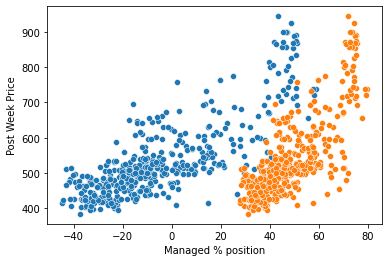

In [25]:
sns.scatterplot(data=df_price,x="Managed % position",y="Post Week Price")
sns.scatterplot(data=df_price,x="Managed Long %",y="Post Week Price")

**Data Visualisation of Top Correlating Industries
Net Positions and Price Action**

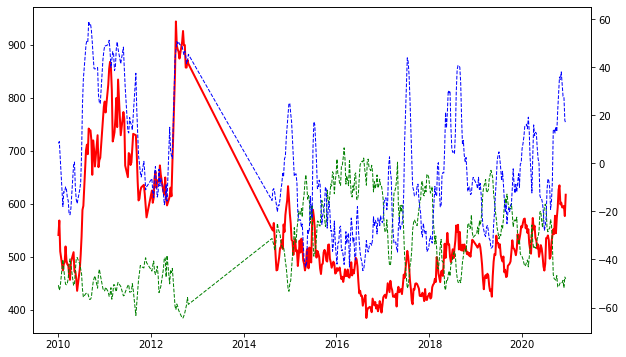

In [26]:
#Shows a graph of instituions net positions against Wheat future prices
X = df_price[['Date']]
Y1=df_price[['Price']]
Y2= df_price[['Merc % position']]
Y3=df_price[['Managed % position']]

fig, ax1 = plt.subplots(figsize=(10,6))
ax2 = ax1.twinx()

ax1.plot(X, Y1, color='red', linewidth=2) #plotting on primary Y-axis

ax2.plot(X, Y2, color='green', linewidth=1, linestyle='--') #plotting on **second** Y-axis
ax2.plot(X, Y3, color='blue', linewidth=1, linestyle='--') #plotting on **second** Y-axis

fig.show()

#Managed money net posiitons closely mirrors/shadows the price action

*Below is closer look at the above diagram, using a years time period*

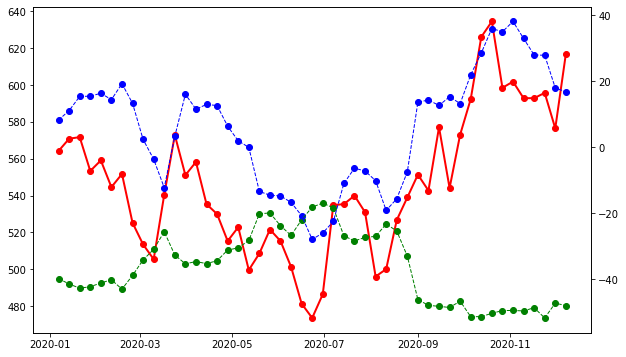

In [27]:
#Show a years data for a closer look at how net positions follow price action
start_date = '2020-01-01'
df_price_year = df_price[df_price["Date"] >= start_date]
   
X = df_price_year[['Date']]
Y1=df_price_year[['Price']]
Y2= df_price_year[['Merc % position']]
Y3=df_price_year[['Managed % position']]

#Shows a graph of instituions net positions against Wheat future prices
#for a year period
fig2, ax3 = plt.subplots(figsize=(10,6))
ax4 = ax3.twinx()

ax3.plot(X, Y1, color='red', linewidth=2) #plotting on primary Y-axis
ax3.scatter(X, Y1, color='red')

ax4.plot(X, Y2, color='green', linewidth=1, linestyle='--') #plotting on **second** Y-axis
ax4.plot(X, Y3, color='blue', linewidth=1, linestyle='--') #plotting on **second** Y-axis
ax4.scatter(X, Y2, color='green')
ax4.scatter(X, Y3, color='blue')

fig2.show()

**Creating a Linear Regression Model**

In [28]:
#Create x (independant) and y (dependant) variables for LinearRegression Model
X = df_price[['Price', 'Managed % position', 'Managed Long %', 
              'Merc % of total Short', 'Merc Short %']]

y = df_price[['Post Week Price']]

In [29]:
#Split data for train and test purposes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

LinReg = LinearRegression()

LinReg.fit(X_train, y_train)

LinearRegression()

In [30]:
predictions = LinReg.predict(X_test)

**Data Visualisation of Pedicted Values vs True Values**

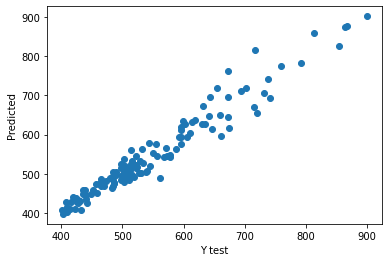

In [31]:
#Scatter graph presenting true values vs predicted
fig3, ax5 = plt.subplots()
ax5.scatter(y_test, predictions)
ax5.set_ylabel('Predicted')
ax5.set_xlabel('Y test')

fig3.show()

**Model Evaluation**

In [32]:
#Shows regression evaluation metrics
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, predictions)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, predictions)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, predictions))))
print('r2: {}'.format(metrics.r2_score(y_test, predictions)))

MAE: 19.00880784476523
MSE: 670.0083163633426
RMSE: 25.88451885516404
r2: 0.942817788500128


**Visualisation of Residuals Distribution**

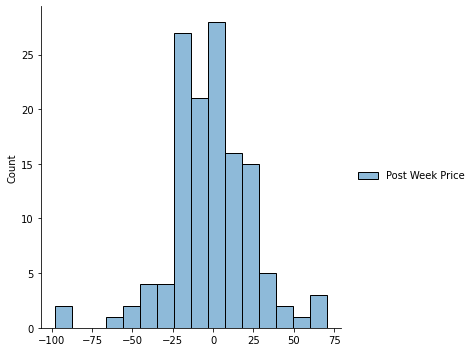

In [33]:
#Graph showing distribution of residuals 
fig4 = sns.displot((y_test-predictions))

**DataFrame of Predicted vs True Values**

In [34]:
#Shows in a df how our predictions compared in relation to actual price movement
y_test['Predictions'] = predictions
y_test['Price'] = X_test['Price']
y_test = y_test.reset_index(drop=True)

y_test

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Post Week Price,Predictions,Price
0,505.50,514.428527,513.50
1,647.25,613.579376,610.63
2,416.00,428.566962,427.75
3,523.00,545.157426,544.75
4,514.00,518.498358,517.75
...,...,...,...
126,485.13,495.217131,493.13
127,479.00,490.244510,489.13
128,540.50,506.582800,505.50
129,864.00,873.973706,871.13


**Further Analysis of Model**

*To test the accuracy of the model, dummy integers are allocated
on the basis a trade will be undertaken using the models prediction
of price change. If the model predicts a price increase and a trade is
placed long, and price increases this is seen as a win: 1

If a trade is placed short, as the model predicts price will decrease.
And the post week price, decreases, this will be seen as a trade
losss : 0*

In [35]:
#If price is predicted correctly a 1 is allocated
#If incorrectly a 0 will be allocated
#This will allow us to easily see when we are wrong and we the
#model is correct, in terms of increase/decrease of price
inc_dec = []
for x,y in enumerate(y_test['Predictions']):
    if y > y_test['Price'][x] and y_test['Post Week Price'][x] > y_test['Price'][x]:
        inc_dec.append(1)
    elif y < y_test['Price'][x] and y_test['Post Week Price'][x] < y_test['Price'][x]:
        inc_dec.append(1)
    else:
        inc_dec.append(0)

y_test['Inc/Dec'] = inc_dec
        

*Number of trades won and number of trades lost*

In [36]:
counter1 = Counter(y_test['Inc/Dec'])

print(counter1)

Counter({1: 67, 0: 64})


**Conclusion**

*Money can be made using a 51% accurate trading system. 
If the risk to reward ratio was sustainable.

However,
further daily and ATR analysis would be needed to actually trade 
this system*

In [37]:
print("""Follwing only increase or decrease bias, in price, 
      you can be 51% correct using this formula""")

Follwing only increase or decrease bias, in price, 
      you can be 51% correct using this formula
